In [17]:
## required packages for this Chapter
import os, random
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from collections import Counter
import math
import plfit
from scipy.stats import poisson

sns.set_theme()
%matplotlib inline

# To export to PDF, run:
# jupyter nbconvert --to webpdf --allow-chromium-download assignment_02.ipynb

## Problem 3

In [2]:
def get_isolated_edges(g):
    nodes = g.vs.select(_degree=1)
#     print(len(nodes), len(g.subgraph(nodes).es))
    return g.subgraph(nodes).es

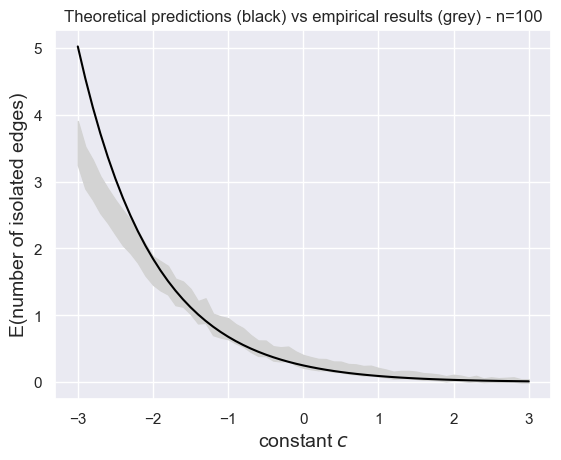

In [3]:
n = 100
REP = 1000 ## repeats
C = np.arange(-3, 3.01,.1)
z = 1.64

# empirical
ic_avg = []
ic_std = []
for c in C:
    x = []
    p = (np.log(n) + np.log(np.log(n)) + c) / (2*n)
    for rep in range(REP):        
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        isolated_edges = get_isolated_edges(g)
        n_isolated_edges = len(isolated_edges)
        x.append(n_isolated_edges)
    ic_avg.append(np.mean(x))
    ic_std.append(np.std(x))

lower_bound = [(m - s * z / np.sqrt(n)) for m,s in zip(ic_avg, ic_std)] 
upper_bound = [(m + s * z / np.sqrt(n)) for m,s in zip(ic_avg, ic_std)] 

## theoretical
th = [np.exp(-c) / 4 for c in C]

## plot
plt.fill_between(C, lower_bound, upper_bound, color='lightgray')
plt.plot(C, th, color='black')
plt.title(f'Theoretical predictions (black) vs empirical results (grey) - n={n}')
plt.xlabel(r'constant $c$', fontsize=14)
plt.ylabel('E(number of isolated edges)', fontsize=14)
plt.show()

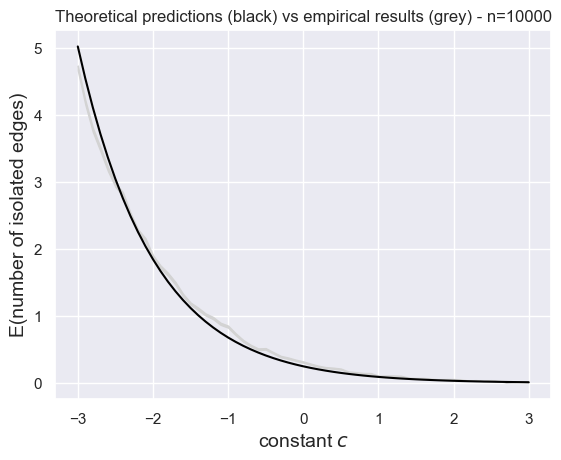

In [4]:
n = 10000
REP = 1000 ## repeats
C = np.arange(-3, 3.01,.1)
z = 1.64

# empirical
ic_avg = []
ic_std = []
for c in C:
    x = []
    p = (np.log(n) + np.log(np.log(n)) + c) / (2*n)
    for rep in range(REP):        
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        isolated_edges = get_isolated_edges(g)
        n_isolated_edges = len(isolated_edges)
        x.append(n_isolated_edges)
    ic_avg.append(np.mean(x))
    ic_std.append(np.std(x))

lower_bound = [(m - s * z / np.sqrt(n)) for m,s in zip(ic_avg, ic_std)] 
upper_bound = [(m + s * z / np.sqrt(n)) for m,s in zip(ic_avg, ic_std)] 

## theoretical
th = [np.exp(-c) / 4 for c in C]

## plot
plt.fill_between(C, lower_bound, upper_bound, color='lightgray')
plt.plot(C, th, color='black')
plt.title(f'Theoretical predictions (black) vs empirical results (grey) - n={n}')
plt.xlabel(r'constant $c$', fontsize=14)
plt.ylabel('E(number of isolated edges)', fontsize=14)
plt.show()

## Problem 6

In [18]:
REP = 10
n = 10000
p = 1.0/4
for rep in range(REP):
    g1 = ig.Graph.Erdos_Renyi(n=n, p=p)
    g2 = ig.Graph.Erdos_Renyi(n=n, p=p)
    g = ig.union([g1, g2])
    density = len(g.es) / math.comb(n, 2)
    print(density)

AttributeError: module 'math' has no attribute 'comb'

**Explanation.**

## Problem 7

In [6]:
dim = 2
size = 100
nei = 8
REP = 10
P = np.arange(0, 1, .1)

gccs = []
alccs = []
for p in P:
    p_gccs = []
    p_alccs = []
    for rep in range(REP):
        g = ig.Graph.Watts_Strogatz(dim, size, nei, p)
        rep_gcc = g.transitivity_undirected()
        rep_alcc = g.transitivity_avglocal_undirected()
        p_gccs.append(rep_gcc)
        p_alccs.append(rep_alcc)
    gcc = np.mean(p_gccs)
    alcc = np.mean(p_alccs)
    gccs.append(gcc)
    alccs.append(alcc)

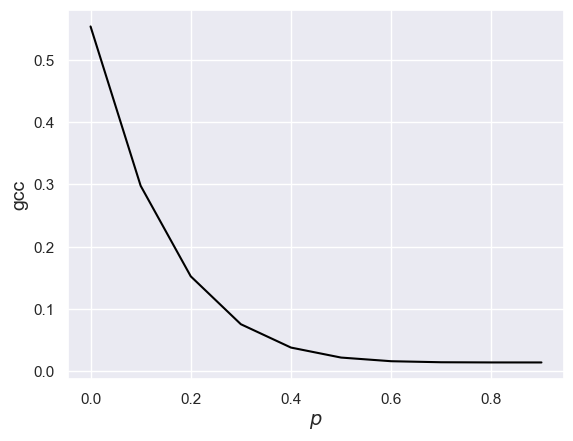

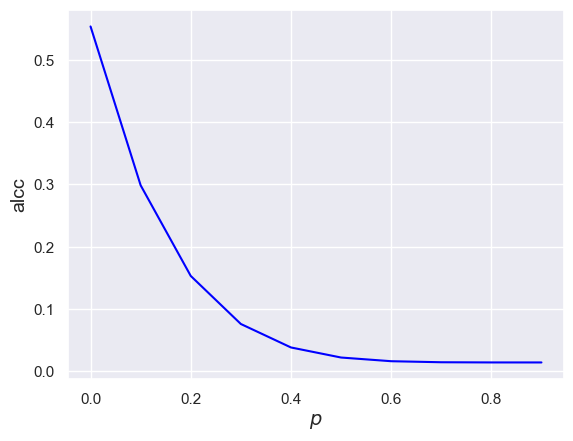

In [11]:
# plot
# plt.plot(P, gccs, color='black')
# plt.plot(P, alccs, color='blue')
# plt.xlabel(r'$p$', fontsize=14)
# plt.ylabel('gcc (black) & alcc (blue)', fontsize=14)
# plt.show()

plt.plot(P, gccs, color='black')
plt.xlabel(r'$p$', fontsize=14)
plt.ylabel('gcc', fontsize=14)
plt.show()

plt.plot(P, alccs, color='blue')
plt.xlabel(r'$p$', fontsize=14)
plt.ylabel('alcc', fontsize=14)
plt.show()

## Problem 8

In [12]:
n = 10000
m = 5
g = ig.Graph.Barabasi(n, m)
deg_dist = ig.Graph.degree_distribution(g, bin_width = 1, mode='in')

(14, 2.973996321702492)


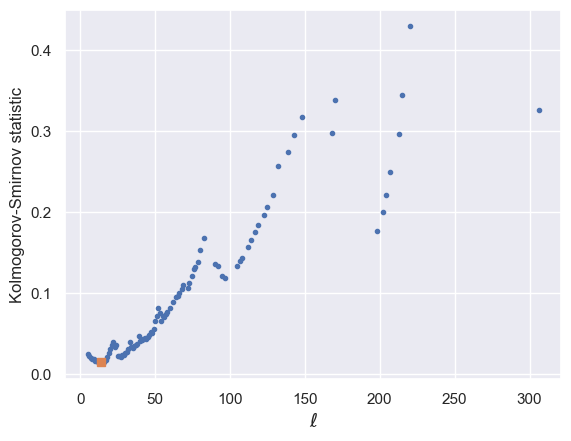

In [13]:
## run plfit and compute K-S statistic (details in the book)
d = g.degree()
X = plfit.plfit(d)

## those are gamma' and l' minimizing divergence from the tail of the power law distribution
print(X.plfit())

## plot K-S statistics vs. cutoff value l
ax = plt.figure(1)
ax = X.xminvsks()
ax.set_xlabel(r'$\ell$',fontsize=14)
ax.set_ylabel('Kolmogorov-Smirnov statistic',fontsize=12);

In [14]:
## K-S test
KS_tst = X.test_pl(niter=100)

p(100) = 1.000


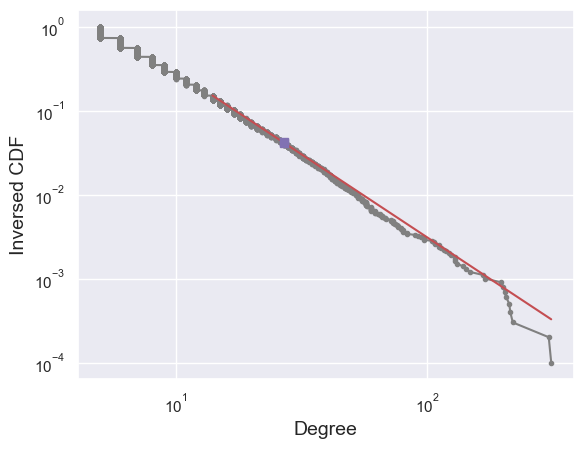

In [36]:
## inverse cdf along with fitted line (as with Figure 2.6 in the book)
fig, ax = plt.subplots()
X.plotcdf(pointcolor='grey', pointmarker='.',zoom=False)
ax.set_xlabel('Degree', fontsize=14)
ax.set_ylabel('Inversed CDF', fontsize=14)
plt.show()